In [67]:
# Importing the libraries
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords


# Loading the data
with open("ProfileData_pickleFiles/refined_profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

In [68]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [69]:
#Printing
df

,Bios,Movies,Religion,Music,Politics,Social Media,Sports,Age,Programming,Traveller
0,Typical communicator. Subtly charming web advocate. Writer. Unapologetic alcohol practitioner.,"[Adventure, Action, Horror]",Buddhist,"[Rock, Classical, Romantic, Jazz]",Moderate,"[Pinterest, Twitter, LinkedIn]","[Chess, Cricket]",26,"[Java, C++, C#, Python]","[Adventure, Treking]"
1,Introvert. Friendly beer guru. Bacon fanatic. Award-winning entrepreneur. Incurable gamer.,"[Drama, Action, Thriller]",Christian,"[EDM, HipHop, Rock, Pop]",Conservative,"[Youtube, Reddit, Facebook]","[Cricket, Basketball, Chess]",19,"[Swift, C++, JavaScript, Go]","[Adventure, Treking, Long Trips, Short journeys]"
2,Friend of animals everywhere. Passionate zombie junkie. Pop culture fan. Devoted tv practitioner.,"[Adventure, Action, Comedy]",Christian,"[Pop, Country, Jazz, Romantic]",Progressive,"[Youtube, Reddit, Twitter]","[Cricket, Baseball, BadmintonFootball]",20,"[Java, JavaScript, C#, Python]","[Adventure, Treking, Short journeys]"
3,Webaholic. Pop culture ninja. Wannabe organizer. Tv guru. Friendly bacon maven. Gamer.,"[Adventure, Drama, Action]",Other,"[EDM, HipHop, Romantic, Jazz]",Liberal,"[Youtube, Reddit, Facebook]","[Chess, Baseball]",25,"[C++, JavaScript, Go, Python]","[Adventure, Long Trips, Short journeys]"
4,Zombie buff. Troublemaker. Social media ninja. Wannabe alcohol fanatic.,"[Drama, Action, Comedy]",Buddhist,"[EDM, Romantic, Jazz]",Liberal,"[Youtube, Pinterest, Facebook]","[Cricket, Chess, BadmintonFootball]",25,"[Swift, JavaScript, Go, Python]","[Adventure, Long Trips, Short journeys]"
...,...,...,...,...,...,...,...,...,...,...
8290,Wannabe analyst. General food enthusiast. Music fanatic. Communicator. Explorer.,"[Adventure, Drama, Thriller]",Muslim,"[Rock, HipHop, Romantic]",Conservative,"[Youtube, Pinterest]","[Chess, Baseball, BadmintonFootball]",19,"[C++, C#, Go]","[Treking, Long Trips]"
8291,Friendly pop cultureaholic. Analyst. Gamer. Amateur music junkie. Future teen idol. Introvert. Explorer. Total creator.,"[Horror, Comedy]",Hindu,"[Rock, Classical, Country, Jazz]",Conservative,"[Youtube, Facebook, Twitter]","[Cricket, Basketball, Chess, Baseball]",32,"[Swift, C#, Python]","[Treking, Long Trips, Short journeys]"
8292,Alcohol nerd. Award-winning music fan. Professional student. Passionate social media evangelist. Coffee scholar.,"[Drama, Action, Thriller]",Agnostic,"[EDM, HipHop, Rock]",Centrist,"[Youtube, Facebook, SnapChat]","[Chess, Cricket, Baseball, BadmintonFootball]",21,"[Swift, JavaScript, C++, Go]","[Treking, Short journeys, Long Trips]"
8293,Organizer. Introvert. Twitter junkie. Certified troublemaker. Hardcore entrepreneur. Internetaholic.,"[Adventure, Drama]",Hindu,"[Rock, Pop, Classical, Country]",Liberal,"[Pinterest, Facebook, Twitter]","[Cricket, Chess, BadmintonFootball]",21,"[Java, C++, JavaScript, Python]","[Adventure, Treking, Short journeys]"


### Tokenizing the bio data

Now, the bio's of the users will be splitted into tokens(means the sentences of the bio's of users will be splited into individual words for the further process of lemmatization.)

*Lemmatization:* It is the process of getting the base form of the given word. Eg.: "lemmatization" -> "lemmatize".

In [70]:
lemma = WordNetLemmatizer()

#Tokenizer
def tokenize(sentence):
    #Tokenizing the bios
    
    #1. Stop words dictionary
    stopwords_list = stopwords.words('english')
    
    #2. Lowercasing the words
    sentence = sentence.lower()
    
    #3. Remove the punctuations
    sentence = sentence.replace('.','')
    
    #4. Space splitting
    sentence = sentence.split(' ')
    
    #5. Removing stop words and storing result in a list
    sentence = [lemma.lemmatize(i) for i in sentence if i not in stopwords_list]
    
    return sentence

df['Bios'] = df.Bios.apply(tokenize)
    
        

In [71]:
df

,Bios,Movies,Religion,Music,Politics,Social Media,Sports,Age,Programming,Traveller
0,"[typical, communicator, subtly, charming, web, advocate, writer, unapologetic, alcohol, practitioner]","[Adventure, Action, Horror]",Buddhist,"[Rock, Classical, Romantic, Jazz]",Moderate,"[Pinterest, Twitter, LinkedIn]","[Chess, Cricket]",26,"[Java, C++, C#, Python]","[Adventure, Treking]"
1,"[introvert, friendly, beer, guru, bacon, fanatic, award-winning, entrepreneur, incurable, gamer]","[Drama, Action, Thriller]",Christian,"[EDM, HipHop, Rock, Pop]",Conservative,"[Youtube, Reddit, Facebook]","[Cricket, Basketball, Chess]",19,"[Swift, C++, JavaScript, Go]","[Adventure, Treking, Long Trips, Short journeys]"
2,"[friend, animal, everywhere, passionate, zombie, junkie, pop, culture, fan, devoted, tv, practitioner]","[Adventure, Action, Comedy]",Christian,"[Pop, Country, Jazz, Romantic]",Progressive,"[Youtube, Reddit, Twitter]","[Cricket, Baseball, BadmintonFootball]",20,"[Java, JavaScript, C#, Python]","[Adventure, Treking, Short journeys]"
3,"[webaholic, pop, culture, ninja, wannabe, organizer, tv, guru, friendly, bacon, maven, gamer]","[Adventure, Drama, Action]",Other,"[EDM, HipHop, Romantic, Jazz]",Liberal,"[Youtube, Reddit, Facebook]","[Chess, Baseball]",25,"[C++, JavaScript, Go, Python]","[Adventure, Long Trips, Short journeys]"
4,"[zombie, buff, troublemaker, social, medium, ninja, wannabe, alcohol, fanatic]","[Drama, Action, Comedy]",Buddhist,"[EDM, Romantic, Jazz]",Liberal,"[Youtube, Pinterest, Facebook]","[Cricket, Chess, BadmintonFootball]",25,"[Swift, JavaScript, Go, Python]","[Adventure, Long Trips, Short journeys]"
...,...,...,...,...,...,...,...,...,...,...
8290,"[wannabe, analyst, general, food, enthusiast, music, fanatic, communicator, explorer]","[Adventure, Drama, Thriller]",Muslim,"[Rock, HipHop, Romantic]",Conservative,"[Youtube, Pinterest]","[Chess, Baseball, BadmintonFootball]",19,"[C++, C#, Go]","[Treking, Long Trips]"
8291,"[friendly, pop, cultureaholic, analyst, gamer, amateur, music, junkie, future, teen, idol, introvert, explorer, total, creator]","[Horror, Comedy]",Hindu,"[Rock, Classical, Country, Jazz]",Conservative,"[Youtube, Facebook, Twitter]","[Cricket, Basketball, Chess, Baseball]",32,"[Swift, C#, Python]","[Treking, Long Trips, Short journeys]"
8292,"[alcohol, nerd, award-winning, music, fan, professional, student, passionate, social, medium, evangelist, coffee, scholar]","[Drama, Action, Thriller]",Agnostic,"[EDM, HipHop, Rock]",Centrist,"[Youtube, Facebook, SnapChat]","[Chess, Cricket, Baseball, BadmintonFootball]",21,"[Swift, JavaScript, C++, Go]","[Treking, Short journeys, Long Trips]"
8293,"[organizer, introvert, twitter, junkie, certified, troublemaker, hardcore, entrepreneur, internetaholic]","[Adventure, Drama]",Hindu,"[Rock, Pop, Classical, Country]",Liberal,"[Pinterest, Facebook, Twitter]","[Cricket, Chess, BadmintonFootball]",21,"[Java, C++, JavaScript, Python]","[Adventure, Treking, Short journeys]"


### Analyzing the data

#### Printing unique words and frequnevy of each word

In [72]:
freq_map = set()

for x in df['Bios']:
    freq_map.update(x)
        
print("Number of unique words: ",len(freq_map))
unique_words = len(freq_map)

# Freq of unique words
words = []

for x in df['Bios']:
    words.extend(x)

bioUniq_freq = FreqDist(words)
bioUniq_freq.most_common(unique_words)

Number of unique words:  104


[('fanatic', 2753),
 ('tv', 2316),
 ('travel', 2280),
 ('food', 2231),
 ('alcohol', 2208),
 ('beer', 2153),
 ('music', 2124),
 ('social', 2104),
 ('web', 2071),
 ('pop', 2069),
 ('medium', 2039),
 ('twitter', 2038),
 ('culture', 1999),
 ('coffee', 1999),
 ('internet', 1923),
 ('ninja', 1904),
 ('bacon', 1848),
 ('zombie', 1840),
 ('geek', 1631),
 ('guru', 1550),
 ('fan', 1510),
 ('lover', 1498),
 ('specialist', 1491),
 ('junkie', 1482),
 ('practitioner', 1468),
 ('aficionado', 1466),
 ('nerd', 1463),
 ('trailblazer', 1455),
 ('enthusiast', 1411),
 ('maven', 1406),
 ('buff', 1403),
 ('expert', 1389),
 ('evangelist', 1368),
 ('scholar', 1311),
 ('thinker', 1111),
 ('advocate', 1110),
 ('writer', 1085),
 ('gamer', 1084),
 ('lifelong', 1072),
 ('devoted', 1069),
 ('total', 1038),
 ('creator', 1037),
 ('typical', 1036),
 ('extreme', 1017),
 ('reader', 1013),
 ('incurable', 995),
 ('infuriatingly', 988),
 ('humble', 988),
 ('troublemaker', 987),
 ('explorer', 984),
 ('proud', 978),
 ('studen

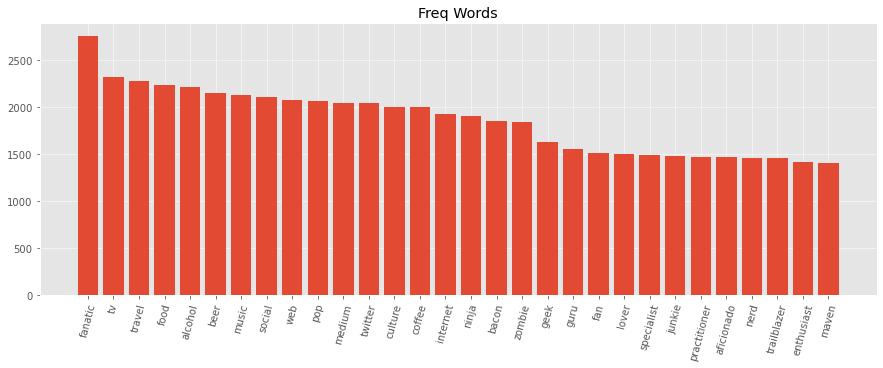

In [73]:
# Plotting the most frequently used words
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bioUniq_freq.most_common(30)))
plt.xticks(rotation=75)
plt.title('Freq Words')
plt.show()

### Trigrams collocations 

In [74]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder

In [75]:
finder = TrigramCollocationFinder.from_words(words)
scoresOfBio = finder.score_ngrams(TrigramAssocMeasures().raw_freq)

In [76]:
scoresOfBio[:50]

[(('friend', 'animal', 'everywhere'), 0.0028912144996777007),
 (('pop', 'culture', 'fanatic'), 0.002796420581655481),
 (('future', 'teen', 'idol'), 0.002758503014446593),
 (('social', 'medium', 'fanatic'), 0.0023414097751488267),
 (('prone', 'fit', 'apathy'), 0.0019811928866643918),
 (('social', 'medium', 'practitioner'), 0.001848481401433284),
 (('type', 'boxing', 'glove'), 0.0017916050506199522),
 (('unable', 'type', 'boxing'), 0.0017916050506199522),
 (('social', 'medium', 'ninja'), 0.0016020172145755128),
 (('social', 'medium', 'maven'), 0.0015072232965532932),
 (('pop', 'culture', 'junkie'), 0.0014124293785310734),
 (('pop', 'culture', 'aficionado'), 0.001241800326091078),
 (('social', 'medium', 'fan'), 0.001222841542486634),
 (('social', 'medium', 'trailblazer'), 0.001222841542486634),
 (('pop', 'culture', 'fan'), 0.0011280476244644143),
 (('pop', 'culture', 'specialist'), 0.0010996094490577485),
 (('social', 'medium', 'expert'), 0.0010142949228377507),
 (('pop', 'culture', 'mave

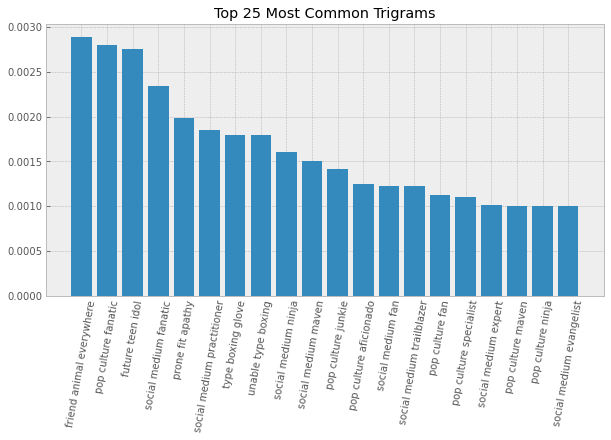

In [77]:
# Creating a list of the trigrams
trigrams = list(map(lambda x: x[0][0] + ' ' + x[0][1]+' '+x[0][2], scoresOfBio[:50]))

# Creating a list of the frequency scores
bio_scores = list(map(lambda x: x[1], scoresOfBio[:50]))

# Combining both the scores and the bigrams
trigrams = list(zip(trigrams, bio_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(10,5))

plt.bar(*zip(*trigrams[:20]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Trigrams')
plt.show()

### Bigrams

In [78]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [79]:
bi_finder = BigramCollocationFinder.from_words(words)
scoresOfBio_bigram = bi_finder.score_ngrams(BigramAssocMeasures().raw_freq)

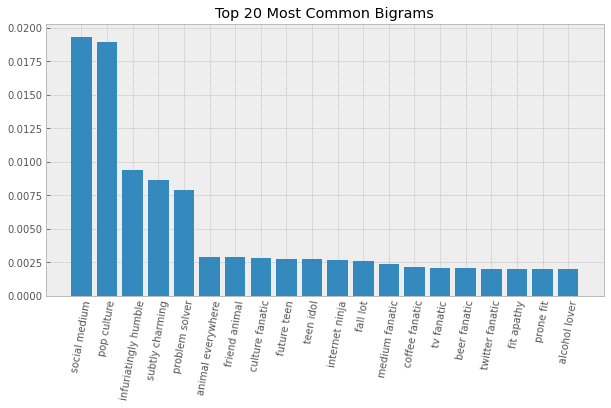

In [80]:
# Creating a list of the bigrams
bigrams = list(map(lambda x: x[0][0] + ' ' + x[0][1], scoresOfBio_bigram[:50]))

# Creating a list of the frequency scores
bio_scores_bi = list(map(lambda x: x[1], scoresOfBio_bigram[:50]))

# Combining both the scores and the bigrams
bigrams = list(zip(bigrams, bio_scores_bi))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(10,5))

plt.bar(*zip(*bigrams[:20]))
plt.xticks(rotation=80)
plt.title('Top 20 Most Common Bigrams')
plt.show()

In [81]:
#bigrams based on frequency of occurence
bi_finder.apply_freq_filter(15)

# Calculating the pointwise mutual information score, which determines how often these words are associated with each other
bio_pmi = bi_finder.score_ngrams(BigramAssocMeasures.pmi)

In [82]:
bio_pmi

[(('boxing', 'glove'), 9.124531646324085),
 (('type', 'boxing'), 9.124531646324085),
 (('unable', 'type'), 9.124531646324085),
 (('fit', 'apathy'), 8.979414938464275),
 (('prone', 'fit'), 8.979414938464275),
 (('fall', 'lot'), 8.57303190449597),
 (('future', 'teen'), 8.501898727636878),
 (('teen', 'idol'), 8.501898727636878),
 (('animal', 'everywhere'), 8.434108638094912),
 (('friend', 'animal'), 8.434108638094912),
 (('problem', 'solver'), 6.982870497100496),
 (('subtly', 'charming'), 6.860225583254245),
 (('infuriatingly', 'humble'), 6.738406838960483),
 (('glove', 'prone'), 6.117612232384294),
 (('pop', 'culture'), 5.67205614068515),
 (('pop', 'cultureaholic'), 5.67205614068515),
 (('social', 'mediaholic'), 5.647855081252857),
 (('social', 'medium'), 5.647855081252857),
 (('mediaholic', 'lifelong'), 5.298756785200023),
 (('total', 'foodaholic'), 5.100142749463387),
 (('musicaholic', 'avid'), 4.648158399787384),
 (('enthusiast', 'twitteraholic'), 4.416916875890291),
 (('musicaholic',

In [83]:
#trigrams based on frequency of occurence
finder.apply_freq_filter(15)

# Calculating the pointwise mutual information score, which determines how often these words are associated with each other
bio_pmi_tri = finder.score_ngrams(TrigramAssocMeasures.pmi)

In [84]:
bio_pmi_tri

[(('type', 'boxing', 'glove'), 18.249063292648174),
 (('unable', 'type', 'boxing'), 18.249063292648174),
 (('prone', 'fit', 'apathy'), 17.95882987692855),
 (('future', 'teen', 'idol'), 17.00379745527375),
 (('friend', 'animal', 'everywhere'), 16.86821727618982),
 (('boxing', 'glove', 'prone'), 15.24214387870838),
 (('glove', 'prone', 'fit'), 15.09702717084857),
 (('student', 'unable', 'type'), 13.026175525370071),
 (('lover', 'unable', 'type'), 12.948168897633007),
 (('introvert', 'prone', 'fit'), 12.823453102070914),
 (('buff', 'unable', 'type'), 12.549651501191743),
 (('teen', 'idol', 'passionate'), 12.542685352997538),
 (('fall', 'lot', 'devoted'), 12.369419890133702),
 (('buff', 'future', 'teen'), 12.221923503625348),
 (('trailblazer', 'prone', 'fit'), 12.152466157273995),
 (('advocate', 'friend', 'animal'), 12.144190737731112),
 (('junkie', 'prone', 'fit'), 12.125939862763808),
 (('fall', 'lot', 'communicator'), 12.048031726031414),
 (('fall', 'lot', 'general'), 12.013486966321931

#### Creating trigrams in df

In [85]:
# Creating trigrams for each pair of words in the bios
df['Trigrams'] = df.Bios.apply(lambda bio: TrigramCollocationFinder.from_words(bio).nbest(TrigramAssocMeasures.pmi, 100))

In [86]:
df[['Bios', 'Trigrams']]

,Bios,Trigrams
0,"[typical, communicator, subtly, charming, web, advocate, writer, unapologetic, alcohol, practitioner]","[(advocate, writer, unapologetic), (charming, web, advocate), (communicator, subtly, charming), (subtly, charming, web), (typical, communicator, subtly), (unapologetic, alcohol, practitioner), (web, advocate, writer), (writer, unapologetic, alcohol)]"
1,"[introvert, friendly, beer, guru, bacon, fanatic, award-winning, entrepreneur, incurable, gamer]","[(award-winning, entrepreneur, incurable), (bacon, fanatic, award-winning), (beer, guru, bacon), (entrepreneur, incurable, gamer), (fanatic, award-winning, entrepreneur), (friendly, beer, guru), (guru, bacon, fanatic), (introvert, friendly, beer)]"
2,"[friend, animal, everywhere, passionate, zombie, junkie, pop, culture, fan, devoted, tv, practitioner]","[(animal, everywhere, passionate), (culture, fan, devoted), (devoted, tv, practitioner), (everywhere, passionate, zombie), (fan, devoted, tv), (friend, animal, everywhere), (junkie, pop, culture), (passionate, zombie, junkie), (pop, culture, fan), (zombie, junkie, pop)]"
3,"[webaholic, pop, culture, ninja, wannabe, organizer, tv, guru, friendly, bacon, maven, gamer]","[(bacon, maven, gamer), (culture, ninja, wannabe), (friendly, bacon, maven), (guru, friendly, bacon), (ninja, wannabe, organizer), (organizer, tv, guru), (pop, culture, ninja), (tv, guru, friendly), (wannabe, organizer, tv), (webaholic, pop, culture)]"
4,"[zombie, buff, troublemaker, social, medium, ninja, wannabe, alcohol, fanatic]","[(buff, troublemaker, social), (medium, ninja, wannabe), (ninja, wannabe, alcohol), (social, medium, ninja), (troublemaker, social, medium), (wannabe, alcohol, fanatic), (zombie, buff, troublemaker)]"
...,...,...
8290,"[wannabe, analyst, general, food, enthusiast, music, fanatic, communicator, explorer]","[(analyst, general, food), (enthusiast, music, fanatic), (fanatic, communicator, explorer), (food, enthusiast, music), (general, food, enthusiast), (music, fanatic, communicator), (wannabe, analyst, general)]"
8291,"[friendly, pop, cultureaholic, analyst, gamer, amateur, music, junkie, future, teen, idol, introvert, explorer, total, creator]","[(amateur, music, junkie), (analyst, gamer, amateur), (cultureaholic, analyst, gamer), (explorer, total, creator), (friendly, pop, cultureaholic), (future, teen, idol), (gamer, amateur, music), (idol, introvert, explorer), (introvert, explorer, total), (junkie, future, teen), (music, junkie, future), (pop, cultureaholic, analyst), (teen, idol, introvert)]"
8292,"[alcohol, nerd, award-winning, music, fan, professional, student, passionate, social, medium, evangelist, coffee, scholar]","[(alcohol, nerd, award-winning), (award-winning, music, fan), (evangelist, coffee, scholar), (fan, professional, student), (medium, evangelist, coffee), (music, fan, professional), (nerd, award-winning, music), (passionate, social, medium), (professional, student, passionate), (social, medium, evangelist), (student, passionate, social)]"
8293,"[organizer, introvert, twitter, junkie, certified, troublemaker, hardcore, entrepreneur, internetaholic]","[(certified, troublemaker, hardcore), (hardcore, entrepreneur, internetaholic), (introvert, twitter, junkie), (junkie, certified, troublemaker), (organizer, introvert, twitter), (troublemaker, hardcore, entrepreneur), (twitter, junkie, certified)]"


In [87]:
# Pickling the tokenized words and trigrams
with open("trigram_df.pkl", "wb") as fp:
    pickle.dump(df, fp)